In [18]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
from IPython.core.display import display, HTML

C:\Users\ijara_go12\AppData\Local\Temp\ipykernel_12040\3448177008.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [30]:
import networkx as nx
from pyvis.network import Network
import pandas as pd
from IPython.core.display import display, HTML

# Sample data
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST"], "semester": 3},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4},
]

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes with hover text (course name)
for _, row in df.iterrows():
    G.add_node(row['shorthand'], label=row['shorthand'], title=row['course_name'], semester=int(row['semester']))

# Add edges based on preliminary courses
for _, row in df.iterrows():
    for prereq in row['preliminary']:
        G.add_edge(prereq, row['shorthand'])

# Set up pyvis network
net = Network(height="750px", width="100%", directed=True)

# Set node positions based on semester (Y-axis)
positions = {}
y_offset = 200
for semester in sorted(df['semester'].unique()):
    nodes_in_semester = df[df['semester'] == semester]['shorthand'].tolist()
    for i, node in enumerate(nodes_in_semester):
        positions[node] = (int(i * 150), int(semester * y_offset))

# Apply positions and add nodes and edges
for node, pos in positions.items():
    net.add_node(node, label=node, title=G.nodes[node]['title'], x=pos[0], y=-pos[1])

for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Generate the network graph
net.set_options("""
var options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -80000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09,
      "avoidOverlap": 1
    }
  }
}
""")

# Save the graph to an HTML file using write_html method
net.write_html("course_graph.html")

# Provide a link to the saved HTML file
display(HTML('<a href="course_graph.html" target="_blank">Open Course Prerequisite Graph</a>'))


C:\Users\ijara_go12\AppData\Local\Temp\ipykernel_12040\20028730.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:

# Provide a link to the saved HTML file
display(HTML('<a href="course_graph.html" target="_blank">Open Course Prerequisite Graph</a>'))


In [32]:
import pandas as pd
import altair as alt

# Sample data with additional metadata (professor)
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1, "professor": "Dr. Smith"},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2, "professor": "Dr. Johnson"},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Williams"},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Brown"},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Davis"},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4, "professor": "Dr. Miller"},
]

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create an edge DataFrame for Altair
edges = []
for _, row in df.iterrows():
    for prereq in row['preliminary']:
        edges.append({
            "source": prereq, 
            "target": row['shorthand'],
            "source_semester": df[df['shorthand'] == prereq]['semester'].values[0],
            "target_semester": row['semester']
        })

edges_df = pd.DataFrame(edges)

# Create the base chart for nodes (courses)
nodes = alt.Chart(df).mark_circle(size=300).encode(
    x=alt.X('semester:O', axis=alt.Axis(title='Semester')),
    y=alt.Y('shorthand:O', axis=alt.Axis(title='Course')),
    tooltip=['course_name', 'professor', 'semester']
).properties(
    width=600,
    height=400
)

# Add text labels for the nodes
text = nodes.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Nudge text to be above the nodes
).encode(
    text='shorthand'
)

# Create the edges (prerequisites) as lines
edges_chart = alt.Chart(edges_df).mark_rule().encode(
    x=alt.X('source_semester:O'),
    x2=alt.X2('target_semester:O'),
    y=alt.Y('source:O'),
    y2=alt.Y2('target:O'),
)

# Combine the charts
chart = edges_chart + nodes + text

# Display the chart
chart.display()


alt.LayerChart(...)

In [12]:
net

<class 'pyvis.network.Network'> |N|=6 |E|=7

In [33]:
from pyvis.network import Network

# Sample data with additional metadata (professor)
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1, "professor": "Dr. Smith"},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2, "professor": "Dr. Johnson"},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Williams"},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Brown"},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Davis"},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4, "professor": "Dr. Miller"},
]

# Initialize the network
net = Network(notebook=True, directed=True)

# Add nodes with metadata
for course in data:
    title = (
        f"Course Name: {course['course_name']}<br>"
        f"Semester: {course['semester']}<br>"
        f"Professor: {course['professor']}"
    )
    net.add_node(course['shorthand'], label=course['shorthand'], title=title)

# Add edges based on prerequisites
for course in data:
    for prereq in course['preliminary']:
        net.add_edge(prereq, course['shorthand'])

# Customize the appearance
net.repulsion(node_distance=150, central_gravity=0.3, spring_length=100, spring_strength=0.05)
net.set_options("""
var options = {
  "nodes": {
    "borderWidth": 2,
    "borderWidthSelected": 4,
    "color": {
      "border": "rgba(0,0,0,0.8)",
      "background": "rgba(255,255,255,1)",
      "highlight": {
        "border": "rgba(0,0,0,1)",
        "background": "rgba(255,255,100,1)"
      }
    },
    "font": {
      "color": "rgba(0,0,0,0.9)",
      "size": 14,
      "face": "arial"
    }
  },
  "edges": {
    "color": {
      "color": "rgba(100,100,100,0.5)",
      "highlight": "rgba(150,150,150,0.8)"
    },
    "arrows": {
      "to": {
        "enabled": true,
        "scaleFactor": 1.5
      }
    }
  },
  "interaction": {
    "hover": true,
    "tooltipDelay": 200
  }
}
""")

# Show the graph
net.show("course_prerequisites.html")


course_prerequisites.html


In [2]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Sample data with additional metadata (professor)
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1, "professor": "Dr. Smith"},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2, "professor": "Dr. Johnson"},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST", "ITP"], "semester": 3, "professor": "Dr. Williams"},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Brown"},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Davis"},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4, "professor": "Dr. Miller"},
]

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes with metadata
for _, row in df.iterrows():
    G.add_node(row['shorthand'], label=row['course_name'], professor=row['professor'], semester=row['semester'])

# Add edges
for _, row in df.iterrows():
    for pre in row['preliminary']:
        G.add_edge(pre, row['shorthand'])

# Assign subsets based on semester
for node in G.nodes():
    G.nodes[node]['subset'] = df[df['shorthand'] == node]['semester'].values[0]

# Compute positions with a top-to-bottom layout and horizontal symmetry
pos = nx.multipartite_layout(G, subset_key="subset")

# Prepare the edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Prepare the node traces
node_x = []
node_y = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    # Hover label
    node_text.append(f"{G.nodes[node]['label']}<br>Professor: {G.nodes[node]['professor']}")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[node for node in G.nodes()],
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color=[],
        size=20,
        line_width=2),
    textposition="top center",
    textfont=dict(size=12)
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Course Dependency Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# Render the graph
fig.show()


In [6]:
import pandas as pd
import networkx as nx
import altair as alt

# Sample data with additional metadata (professor)
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1, "professor": "Dr. Smith"},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2, "professor": "Dr. Johnson"},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST", "ITP"], "semester": 3, "professor": "Dr. Williams"},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Brown"},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Davis"},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4, "professor": "Dr. Miller"},
]

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes with metadata
for _, row in df.iterrows():
    G.add_node(row['shorthand'], label=row['course_name'], professor=row['professor'], semester=row['semester'])

# Add edges
for _, row in df.iterrows():
    for pre in row['preliminary']:
        G.add_edge(pre, row['shorthand'])

# Extract positions using a multipartite layout
pos = nx.multipartite_layout(G, subset_key="semester")

# Convert position data to a DataFrame
pos_df = pd.DataFrame(pos).T.reset_index()
pos_df.columns = ['shorthand', 'x', 'y']

# Merge position data with the original DataFrame
df = df.merge(pos_df, on='shorthand')

# Create a DataFrame for edges
edge_df = pd.DataFrame(list(G.edges()), columns=['source', 'target'])
edge_df = edge_df.merge(df[['shorthand', 'x', 'y']], left_on='source', right_on='shorthand')
edge_df = edge_df.merge(df[['shorthand', 'x', 'y']], left_on='target', right_on='shorthand', suffixes=('_source', '_target'))

# Plot the graph using Altair
edge_chart = alt.Chart(edge_df).mark_line().encode(
    x='x_source',
    y='y_source',
    x2='x_target',
    y2='y_target'
).properties(
    width=600,
    height=400
)

# Node chart with larger, non-transparent nodes
node_chart = alt.Chart(df).mark_circle(size=400, opacity=1).encode(
    x='x',
    y='y',
    tooltip=['course_name', 'professor'],
    color=alt.Color('semester:N', legend=None)
).properties(
    width=600,
    height=400
)

# Text chart with labels inside nodes
text_chart = alt.Chart(df).mark_text(align='center', baseline='middle', size=12).encode(
    x='x',
    y='y',
    text='shorthand',
    tooltip=['course_name', 'professor']
)

# Combine the edge and node charts
chart = edge_chart + node_chart + text_chart

# Hide axis lines and ticks, remove axis titles
chart = chart.configure_axis(
    grid=False,
    domain=False,
    ticks=False,
    labels=False,
    title=None
).configure_view(
    strokeWidth=0
)

# Render the chart
chart.show()


alt.LayerChart(...)

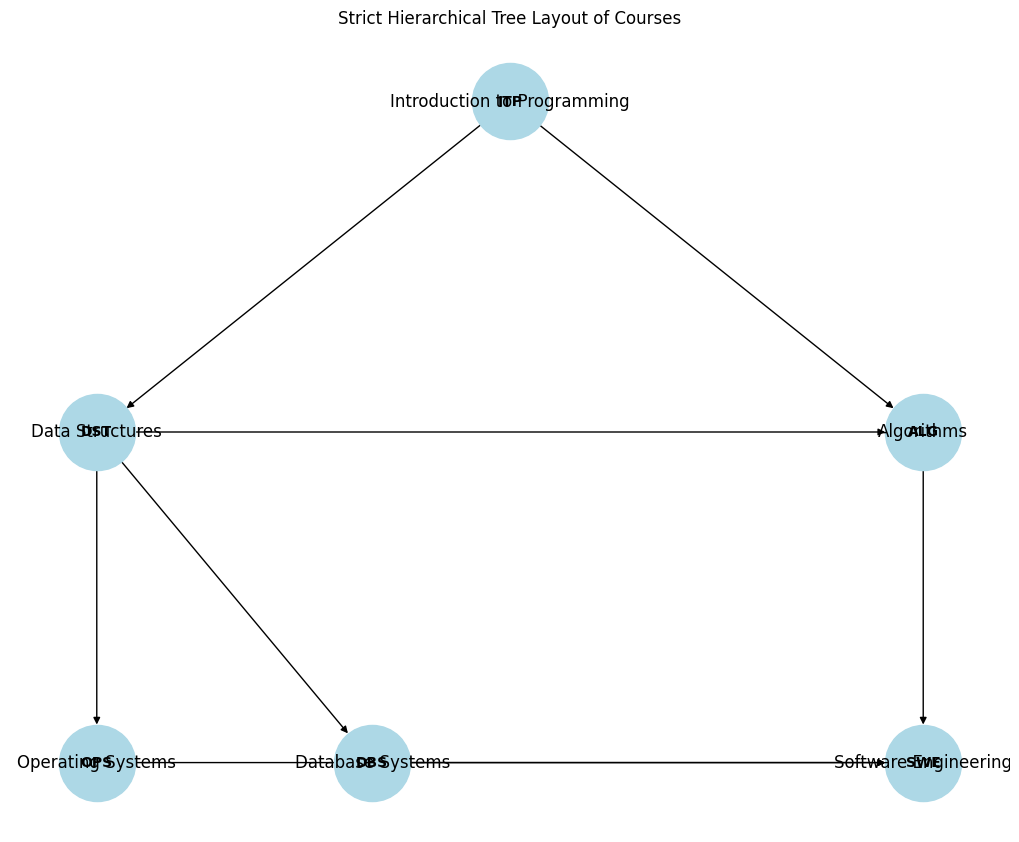

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Data setup
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1, "professor": "Dr. Smith"},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2, "professor": "Dr. Johnson"},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST", "ITP"], "semester": 3, "professor": "Dr. Williams"},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Brown"},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Davis"},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4, "professor": "Dr. Miller"},
]

# Create the directed graph
G = nx.DiGraph()

# Add nodes and edges
for course in data:
    G.add_node(course['shorthand'], label=course['course_name'], semester=course['semester'], professor=course['professor'])
    for pre in course['preliminary']:
        G.add_edge(pre, course['shorthand'])

# Recursive function to calculate positions
def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
    if len(children) != 0:
        dx = width / len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    return pos

# Compute the positions
pos = hierarchy_pos(G, root="ITP")

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, with_labels=True, arrows=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels)
plt.title("Strict Hierarchical Tree Layout of Courses")
plt.show()


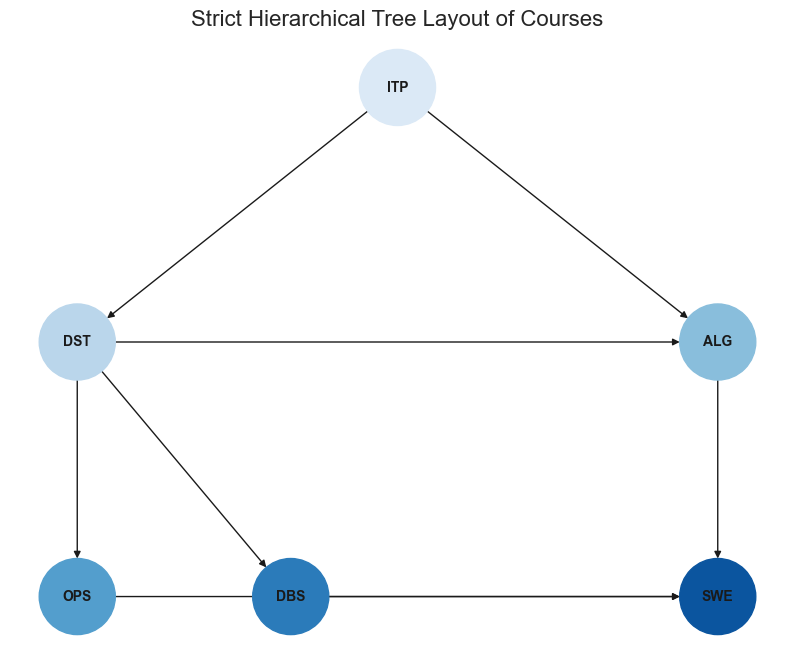

In [4]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

# Data setup
data = [
    {"course_name": "Introduction to Programming", "shorthand": "ITP", "preliminary": [], "semester": 1, "professor": "Dr. Smith"},
    {"course_name": "Data Structures", "shorthand": "DST", "preliminary": ["ITP"], "semester": 2, "professor": "Dr. Johnson"},
    {"course_name": "Algorithms", "shorthand": "ALG", "preliminary": ["DST", "ITP"], "semester": 3, "professor": "Dr. Williams"},
    {"course_name": "Operating Systems", "shorthand": "OPS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Brown"},
    {"course_name": "Database Systems", "shorthand": "DBS", "preliminary": ["DST"], "semester": 3, "professor": "Dr. Davis"},
    {"course_name": "Software Engineering", "shorthand": "SWE", "preliminary": ["ALG", "OPS", "DBS"], "semester": 4, "professor": "Dr. Miller"},
]

# Create the directed graph
G = nx.DiGraph()

# Add nodes and edges
for course in data:
    G.add_node(course['shorthand'], label=course['course_name'], semester=course['semester'], professor=course['professor'])
    for pre in course['preliminary']:
        G.add_edge(pre, course['shorthand'])

# Recursive function to calculate positions
def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
    if len(children) != 0:
        dx = width / len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    return pos

# Compute the positions
pos = hierarchy_pos(G, root="ITP")

# Set up Seaborn style
sns.set(style="whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the graph with Seaborn aesthetics
nx.draw(G, pos=pos, with_labels=True, labels={node: node for node in G.nodes()}, arrows=True,
        node_size=3000, node_color=sns.color_palette("Blues", len(G.nodes())),
        font_size=10, font_weight="bold", ax=ax)

# Create hover labels for full course names
labels = nx.get_node_attributes(G, 'label')
hover_labels = {k: f"Course: {v}\nSemester: {G.nodes[k]['semester']}\nProfessor: {G.nodes[k]['professor']}" for k, v in labels.items()}

# Attach hover functionality using mplcursors
cursor = mplcursors.cursor(ax, hover=True)
@cursor.connect("add")
def on_add(sel):
    node = sel.index
    label = hover_labels.get(list(G.nodes)[node])
    sel.annotation.set(text=label, position=(0, 20), anncoords="offset points")

# Set the title
plt.title("Strict Hierarchical Tree Layout of Courses", fontsize=16)

plt.show()


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("msinbacourselist24-25.xlsx")

,Unnamed: 0,This version: 2024-08-01,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,MS IN BUSINESS ANALYTICS COURSE LIST 2024-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0. PRE-SESSION,NaN,Instructor,TA,Prerequisites,Mandatory credits,Elective credits,Home program,Term part
2,ECBS5154,Mathematics and Informatics Pre-session for Bu...,"Kiss, Oliver",NaN,NaN,0 (3),NaN,BA,Pre
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1. FALL 2024-25 (Sep - Dec),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ECBS5075,Maximizing Your Future (remedial course),"Szarvas, Krisztina",NaN,NaN,NaN,0 (2),F,F1
6,ECBS5208,Coding 1: Data Management and Analysis with Py...,"Duronelly, Peter",TBA,Pre-session,1,NaN,BA,F1
7,ECBS5140,Data Analysis 1: Exploration - Business Analyt...,"Sari, Andras / Duronelly, Peter",NaN,Pre-session,2,NaN,BA,F1
8,ECBS5146,Data Engineering 1: SQL and Different Shapes o...,"Sallo, Laszlo",NaN,Pre-session,2,NaN,BA,F1
9,ECBS5209,Data Visualization 1: Introduction to Data Vis...,"Arato, Bence",NaN,Pre-session,1,NaN,BA,F1
